# Parameter sensitivity to informed trader's speed

In [1]:
import sys
import utils as utils
from importlib import reload
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
reload(utils)

C:\Users\muham\AppData\Roaming\Python\Python38\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


<module 'utils' from 'D:\\(Akademik)\\(CDT in Mathematics of Random Systems)\\[Broker, Informed, Noise Traders, Filtering Game]\\utils.py'>

In [2]:
%load_ext autoreload
%autoreload 2
np.random.seed(100)

In [3]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%config InlineBackend.figure_format = "retina"

In [4]:
font1 = 25
font2 = 23

In [5]:
# choosing strategy type
# available strategies are "our model", "alternative filter", "naive filter"
# mispecify parameter represents whether the broker mispecifies the informed trader's inventory or not

strategy_type = "our model"
mispecify = False
file_name = f'{strategy_type}'
if mispecify:
    file_name += f' (mispecified inventory)'
    
alpha_est_name = {"our model": r'$\hat{\alpha}_t$',
                  "alternative filter": r'$\hat{\alpha}^{alt}_t$',
                  "naive filter": r'$\hat{\alpha}^{naive}_t$'}

In [18]:
scale_ivp = 100000 # change this to change the scale in solving ivp for V_B

num_steps = 1000

f_mu_B_list = []
f_theta_B_list = []
f_sigma_B_list = []

param_dict = {'mu_B': (np.linspace(-10, 10, num_steps + 1), f_mu_B_list),
              'theta_B': (np.linspace(0, 50, num_steps + 1), f_theta_B_list),
              'sigma_B': (np.linspace(0, 150, num_steps + 1), f_sigma_B_list)}

param_symb = {'mu_B': r'$\mu^B$',
              'theta_B': r'$\theta^B$',
              'sigma_B': r'$\sigma^B$'}

coef_symb = {0: r'$z_0^I(t)$',
             1: r'$z_1^I(t)$',
             2: r'$z_2^I(t)$',
             9: r'$g_2^I(t)$'}

In [19]:
for param, (param_range, f_list) in param_dict.items():
    
    # baseline parameters
    mu_B = 0
    theta_B = 5
    sigma_B = 60
    
    for param_val in param_range:
        if param == 'mu_B':
            mu_B = param_val
        elif param == 'theta_B':
            theta_B = param_val
        elif param == 'sigma_B':
            sigma_B = param_val
            
        params_env = {'b': 1e-03, 'alpha0': 0, 'kappa_alpha': 5, 'sigma_alpha': 1, 
              'S0': 100., 'sigma_s': 1, 'corr': 0., 'T': 1., 'Nt': 1_000}

        env = utils.environment(**params_env)

        params_inf = {'env': env, 'Q0' : 0., 'k' : 2e-03, 'beta0' : 1e-01, 'beta1' : 1e-03, 'rho0' : 1e-03, 'rho1' : 1e-05,
                      'sigma_B' : sigma_B, 'mu_B' : mu_B, 'theta_B' : theta_B, 'sigma_0' : 0}

        inf_trader =  utils.informed(**params_inf)
        z = inf_trader.z
        f_list.append(z)

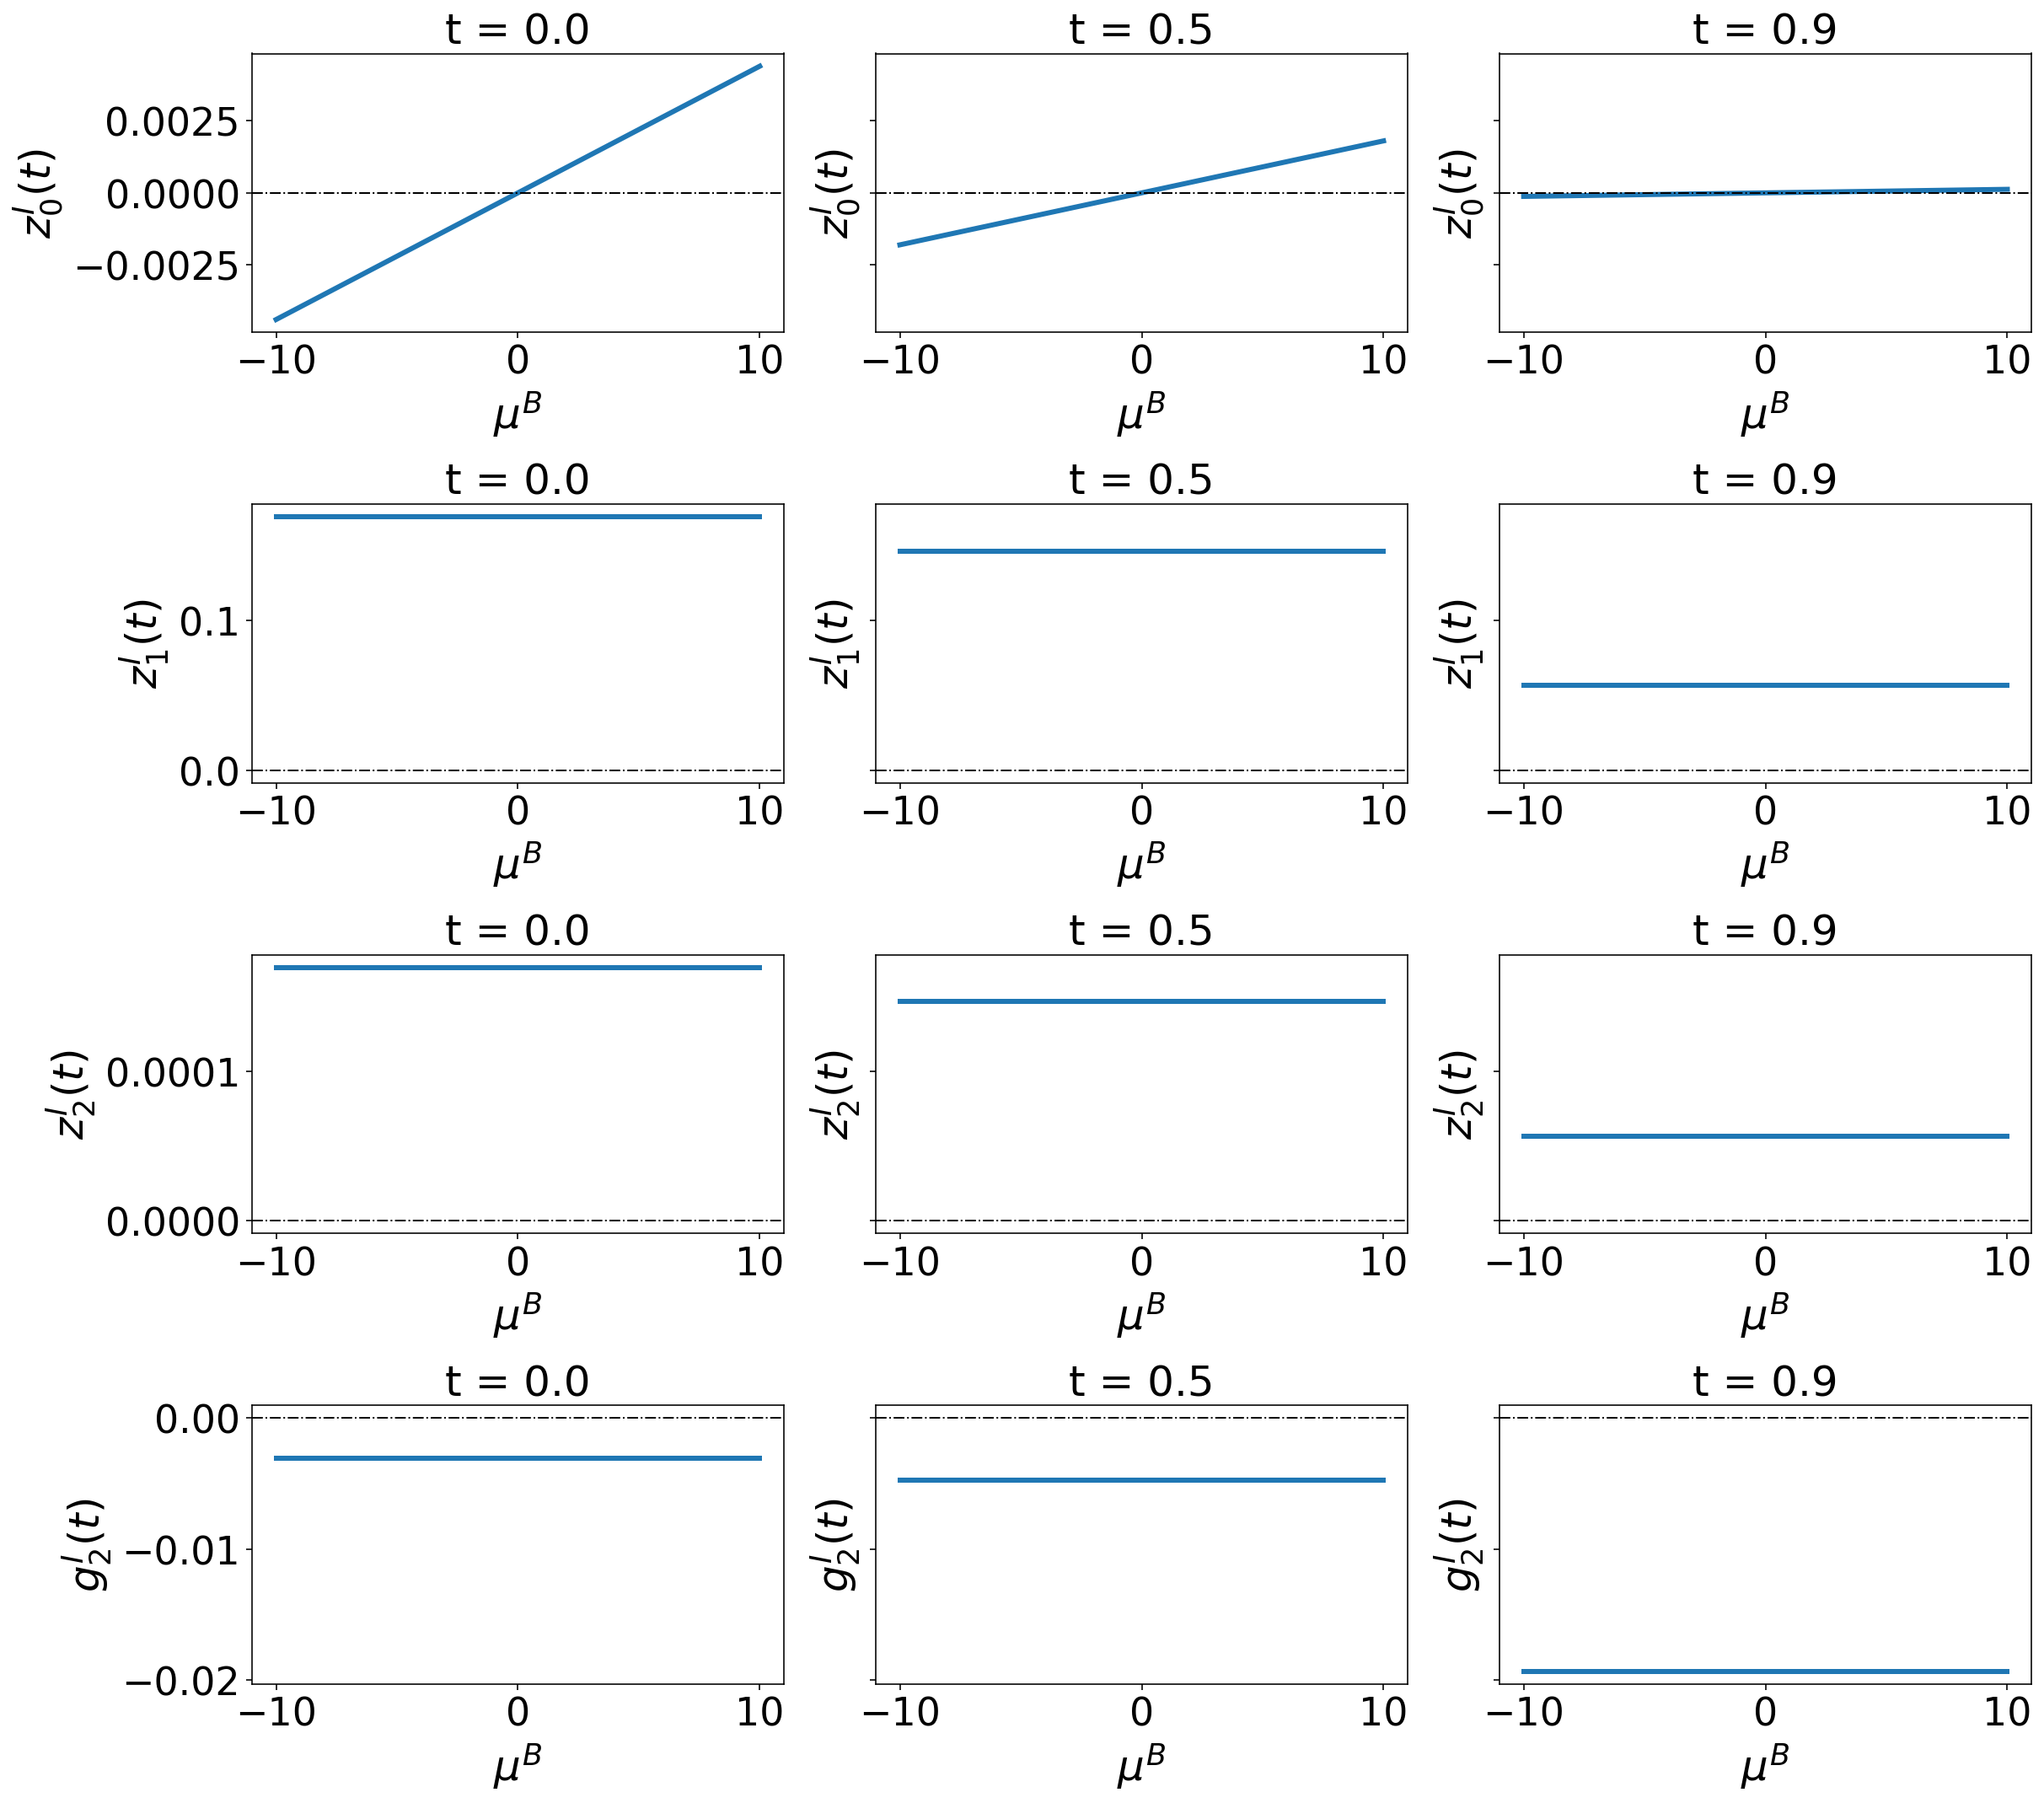

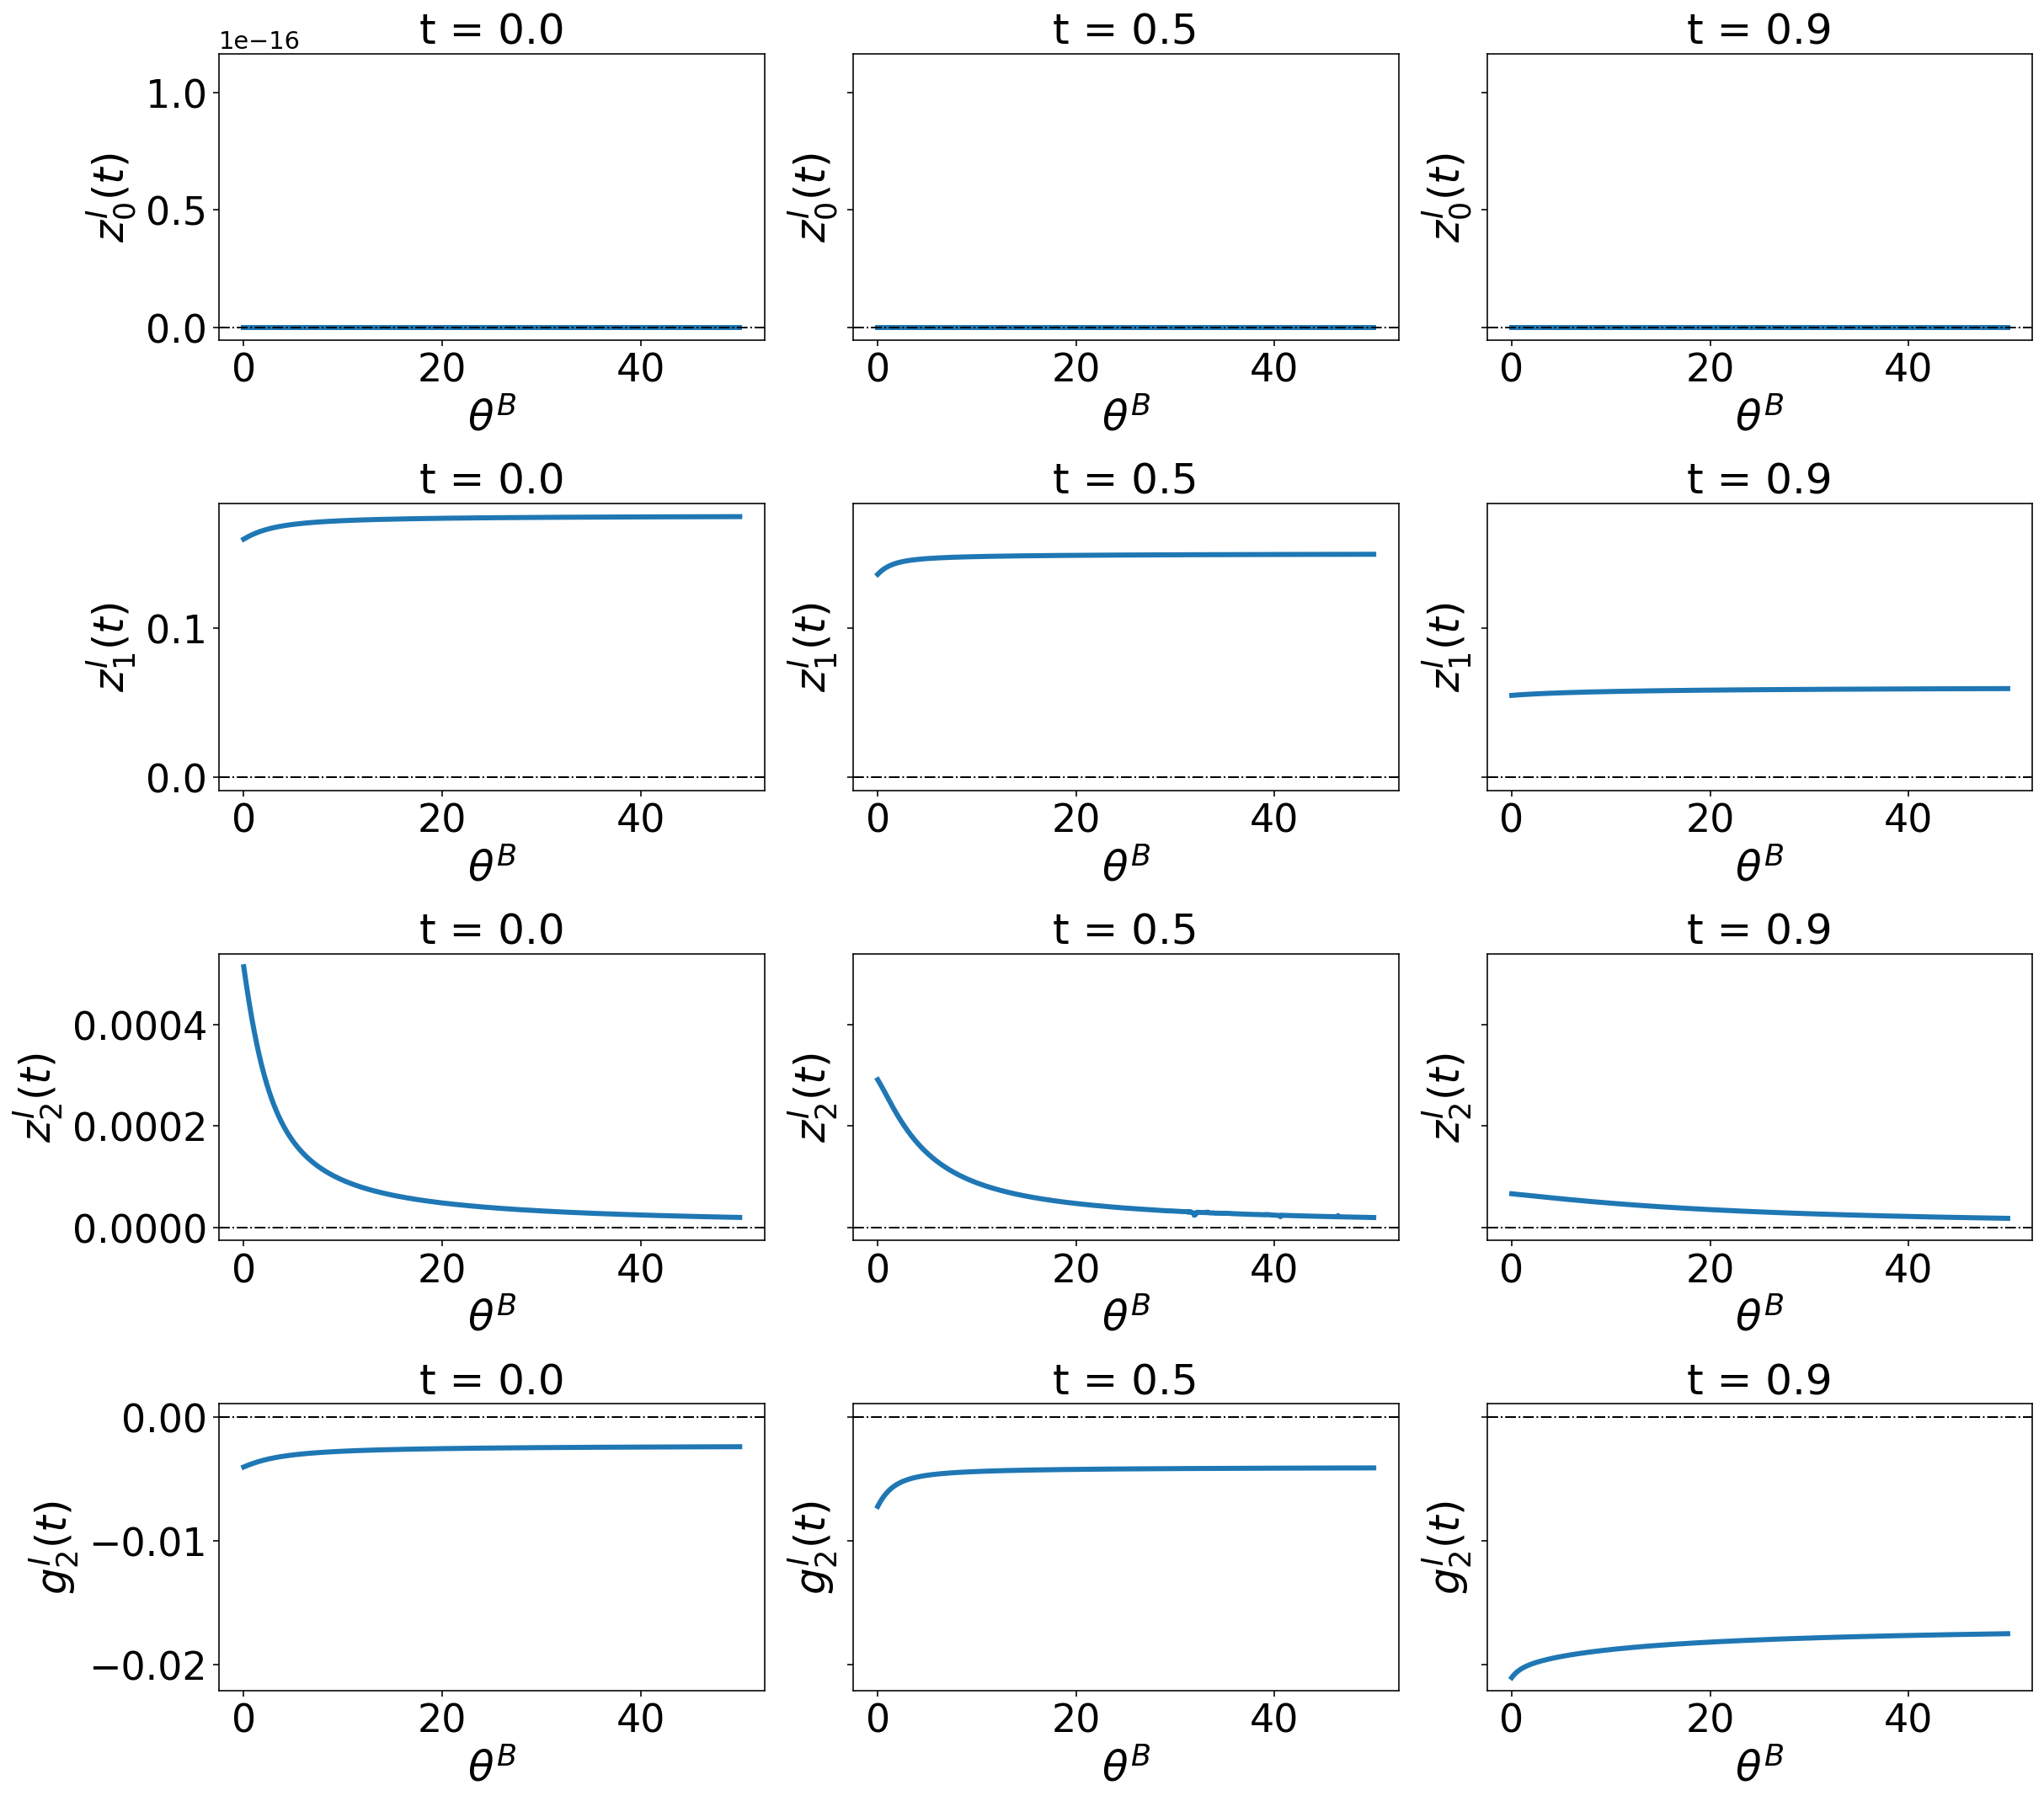

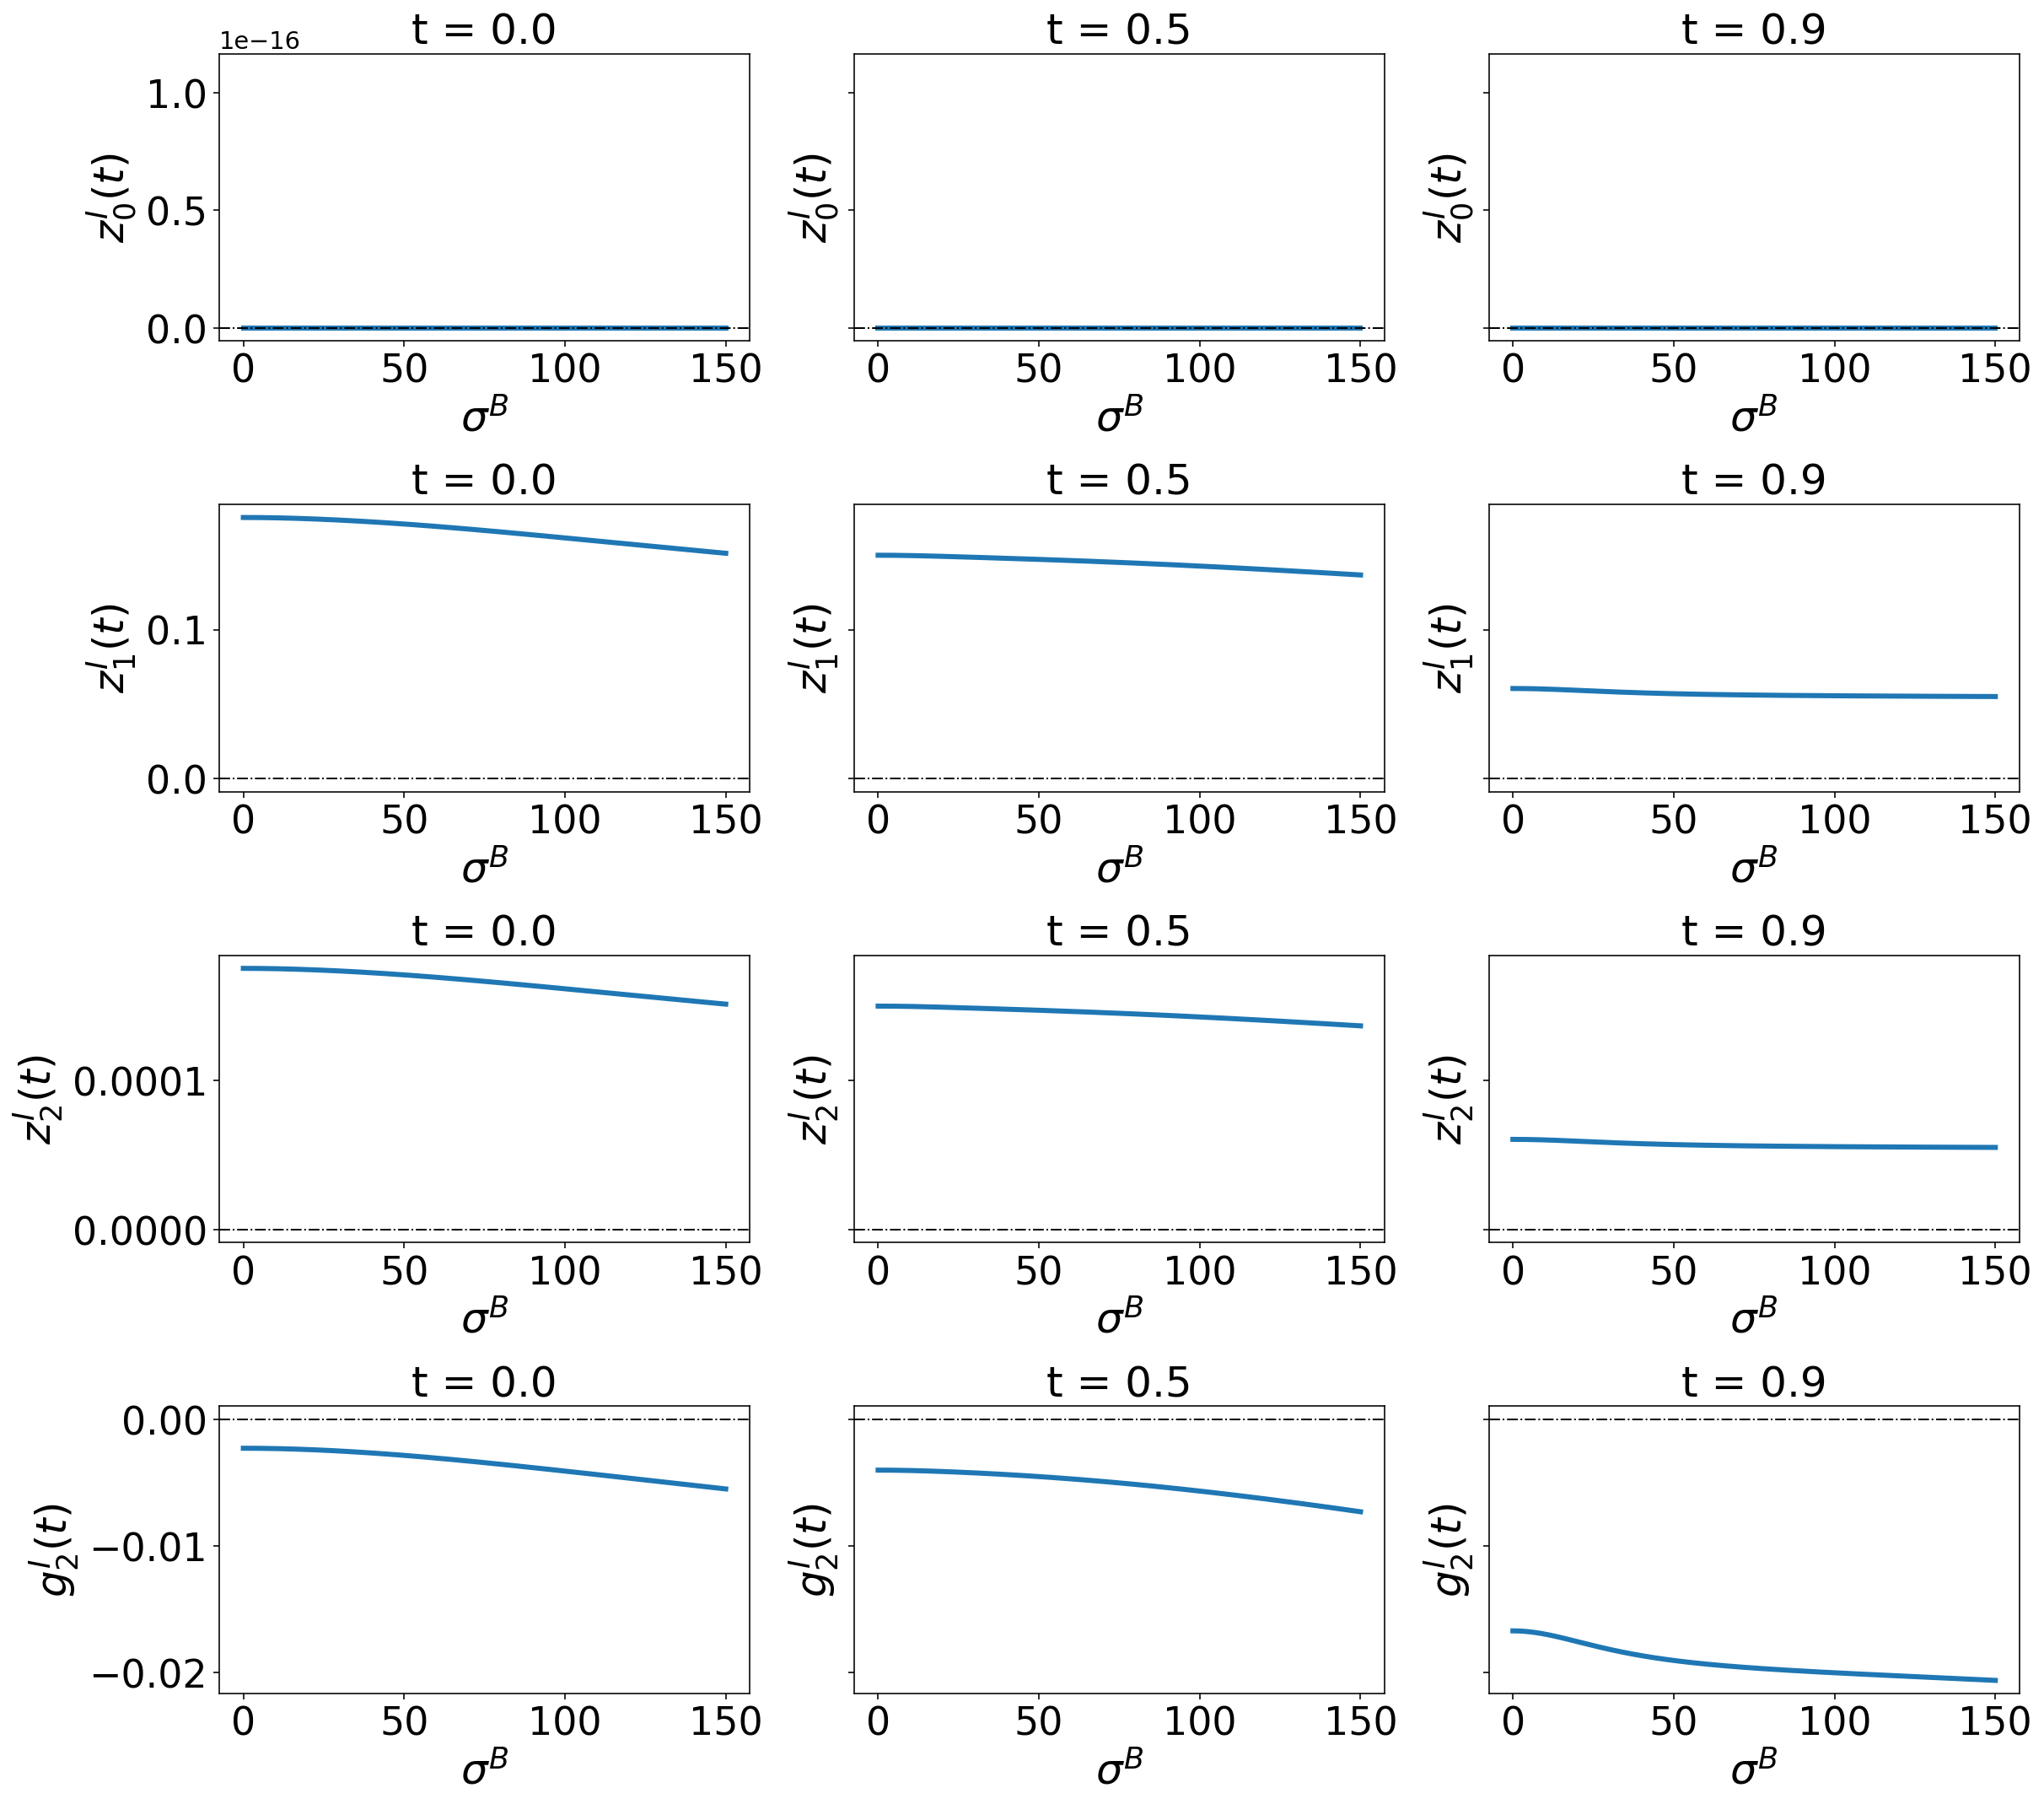

In [22]:
Nt = env.Nt

t_id = [0, Nt//2, 9*Nt//10]

for i, (param, (param_range, f_list)) in enumerate(param_dict.items()):
    fig, ax = plt.subplots(4, 3, figsize=(17,15), sharey = 'row')
    for k, (z_idx, coef) in enumerate(coef_symb.items()):
        for j, t in enumerate(t_id):
            f_param = np.array([f_list[j][z_idx][t] for j in range((len(param_range)))])
            ax[k,j].plot(param_range, f_param, linewidth = 3)
            ax[k,j].set_xlabel(param_symb[param],fontsize=font1)
            ax[k,j].set_ylabel(coef,fontsize=font1)
            ax[k,j].set_title(f't = {env.timesteps[t]}',fontsize=font1)
            #ax[k,j].legend(fontsize=16,loc='upper left')
            ax[k,j].axhline(0, linestyle='-.', color = 'black', linewidth=1)
            ax[k,j].tick_params(axis='both', which='major', labelsize=font2)

    plt.tight_layout()
    plt.savefig(f'figures/nuI coef varying params uncertainty with {param}.png',format='png',bbox_inches='tight')
    plt.savefig(f'figures/nuI coef varying params uncertainty with {param}.pdf',format='pdf',bbox_inches='tight')
    plt.show()

## Broker's side

In [28]:
coef_symb = {0: 'base coef',
             1: r'$q^B$ coef',
             2: r'$\hat{\alpha}$ coef',
             3: r'$\xi$ coef',
             4: r'$q^I$ coef'}

In [32]:
scale_ivp = 100000 # change this to change the scale in solving ivp for V_B

num_steps = 100

f_mu_B_list = []
f_theta_B_list = []
f_sigma_B_list = []

param_dict = {'mu_B': (np.linspace(-10, 10, num_steps + 1), f_mu_B_list),
              'theta_B': (np.linspace(0, 50, num_steps + 1), f_theta_B_list),
              'sigma_B': (np.linspace(0, 150, num_steps + 1), f_sigma_B_list)}

In [30]:
import time

In [33]:
params_env = {'b': 1e-03, 'alpha0': 0, 'kappa_alpha': 5, 'sigma_alpha': 1, 
              'S0': 100., 'sigma_s': 1, 'corr': 0., 'T': 1., 'Nt': 1_000}

env = utils.environment(**params_env)

params_uninf = {'kappa' : 15., 'nu0' : 0., 'sigma' : 100., 'k' : 2e-03}

uninf_trader = utils.uninformed(**params_uninf)

for param, (param_range, f_list) in param_dict.items():
    
    # baseline parameters
    mu_B = 0
    theta_B = 5
    sigma_B = 60
    
    for param_val in param_range:
        st = time.time()
        
        if param == 'mu_B':
            mu_B = param_val
        elif param == 'theta_B':
            theta_B = param_val
        elif param == 'sigma_B':
            sigma_B = param_val

        params_inf = {'env': env, 'Q0' : 0., 'k' : 2e-03, 'beta0' : 1e-01, 'beta1' : 1e-03, 'rho0' : 1e-03, 'rho1' : 1e-05,
                      'sigma_B' : sigma_B, 'mu_B' : mu_B, 'theta_B' : theta_B, 'sigma_0' : 0}

        inf_trader =  utils.informed(**params_inf)
        
        params_broker = {'env': env, 'inf': inf_trader, 'uninf': uninf_trader,
                 'Q0': 0, 'k': 2.1e-03, 'beta0': 1e-01, 'beta1': 1e-03, 'rho0': 1e-03, 'rho1': 1e-05, 
                 'sigma_B': inf_trader.sigma_B, 'mu_B': inf_trader.mu_B, 'theta_B': inf_trader.theta_B, 
                 'sigma_0': 0, 'scale_ivp': scale_ivp}
        
        broker = utils.broker(**params_broker)
        
        coef = broker.coef_speed_B
        f_list.append(coef)
        et = time.time()
        elapsed_time = et - st
        print('Execution time:', elapsed_time, 'seconds')

Execution time: 5.100127220153809 seconds
Execution time: 5.116842269897461 seconds
Execution time: 5.689854860305786 seconds
Execution time: 6.510303258895874 seconds
Execution time: 6.631244659423828 seconds
Execution time: 6.587248086929321 seconds
Execution time: 5.3210530281066895 seconds
Execution time: 4.6937878131866455 seconds
Execution time: 4.650772571563721 seconds
Execution time: 4.746683835983276 seconds
Execution time: 4.782301902770996 seconds
Execution time: 4.776845216751099 seconds
Execution time: 4.7171385288238525 seconds
Execution time: 4.801656246185303 seconds
Execution time: 4.800782918930054 seconds
Execution time: 4.802575349807739 seconds
Execution time: 4.843247413635254 seconds
Execution time: 4.589291095733643 seconds
Execution time: 4.813358545303345 seconds
Execution time: 4.630724191665649 seconds
Execution time: 4.669677495956421 seconds
Execution time: 5.2610273361206055 seconds
Execution time: 5.549100637435913 seconds
Execution time: 4.743827819824

Execution time: 4.078461170196533 seconds
Execution time: 4.351058483123779 seconds
Execution time: 4.388430833816528 seconds
Execution time: 4.309421062469482 seconds
Execution time: 4.377782583236694 seconds
Execution time: 4.11426854133606 seconds
Execution time: 4.002950191497803 seconds
Execution time: 3.911102771759033 seconds
Execution time: 3.895742416381836 seconds
Execution time: 3.8519599437713623 seconds
Execution time: 3.998607873916626 seconds
Execution time: 3.876126527786255 seconds
Execution time: 3.878685474395752 seconds
Execution time: 3.896838903427124 seconds
Execution time: 4.019794464111328 seconds
Execution time: 3.8782012462615967 seconds
Execution time: 3.918299913406372 seconds
Execution time: 3.87138032913208 seconds
Execution time: 3.9606034755706787 seconds
Execution time: 3.8699491024017334 seconds
Execution time: 3.8865060806274414 seconds
Execution time: 3.996307134628296 seconds
Execution time: 4.13514518737793 seconds
Execution time: 4.04038548469543

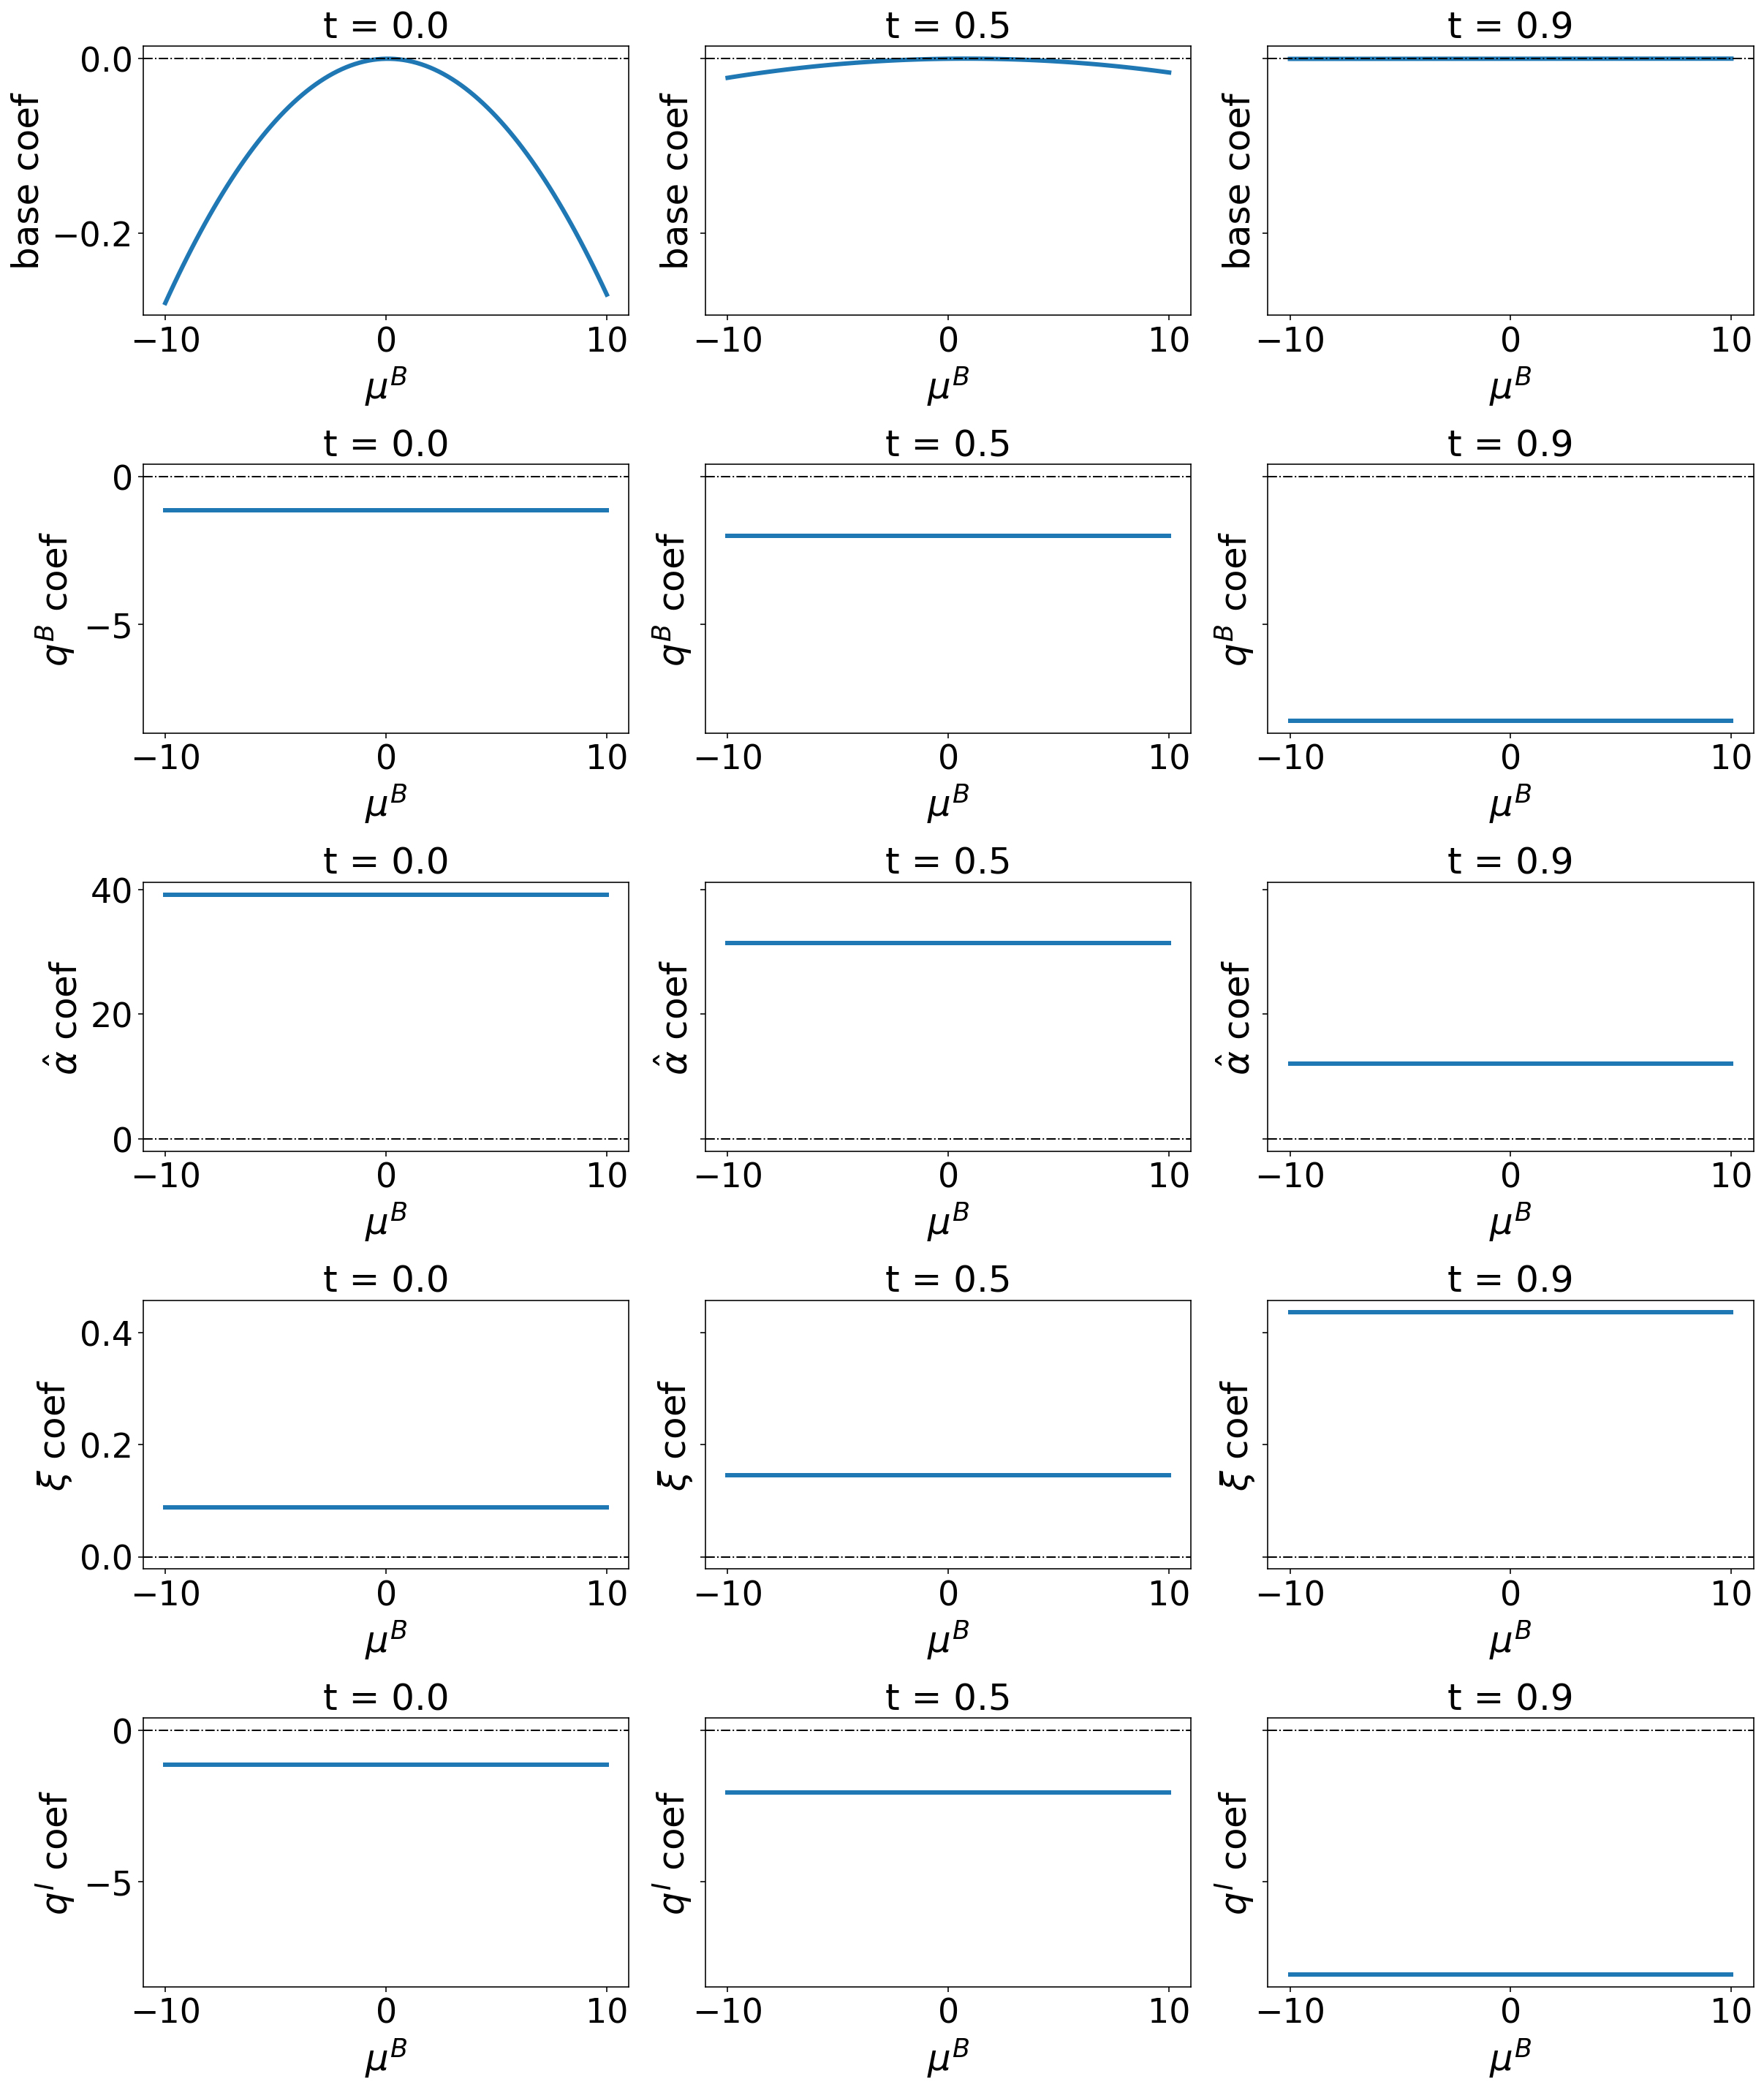

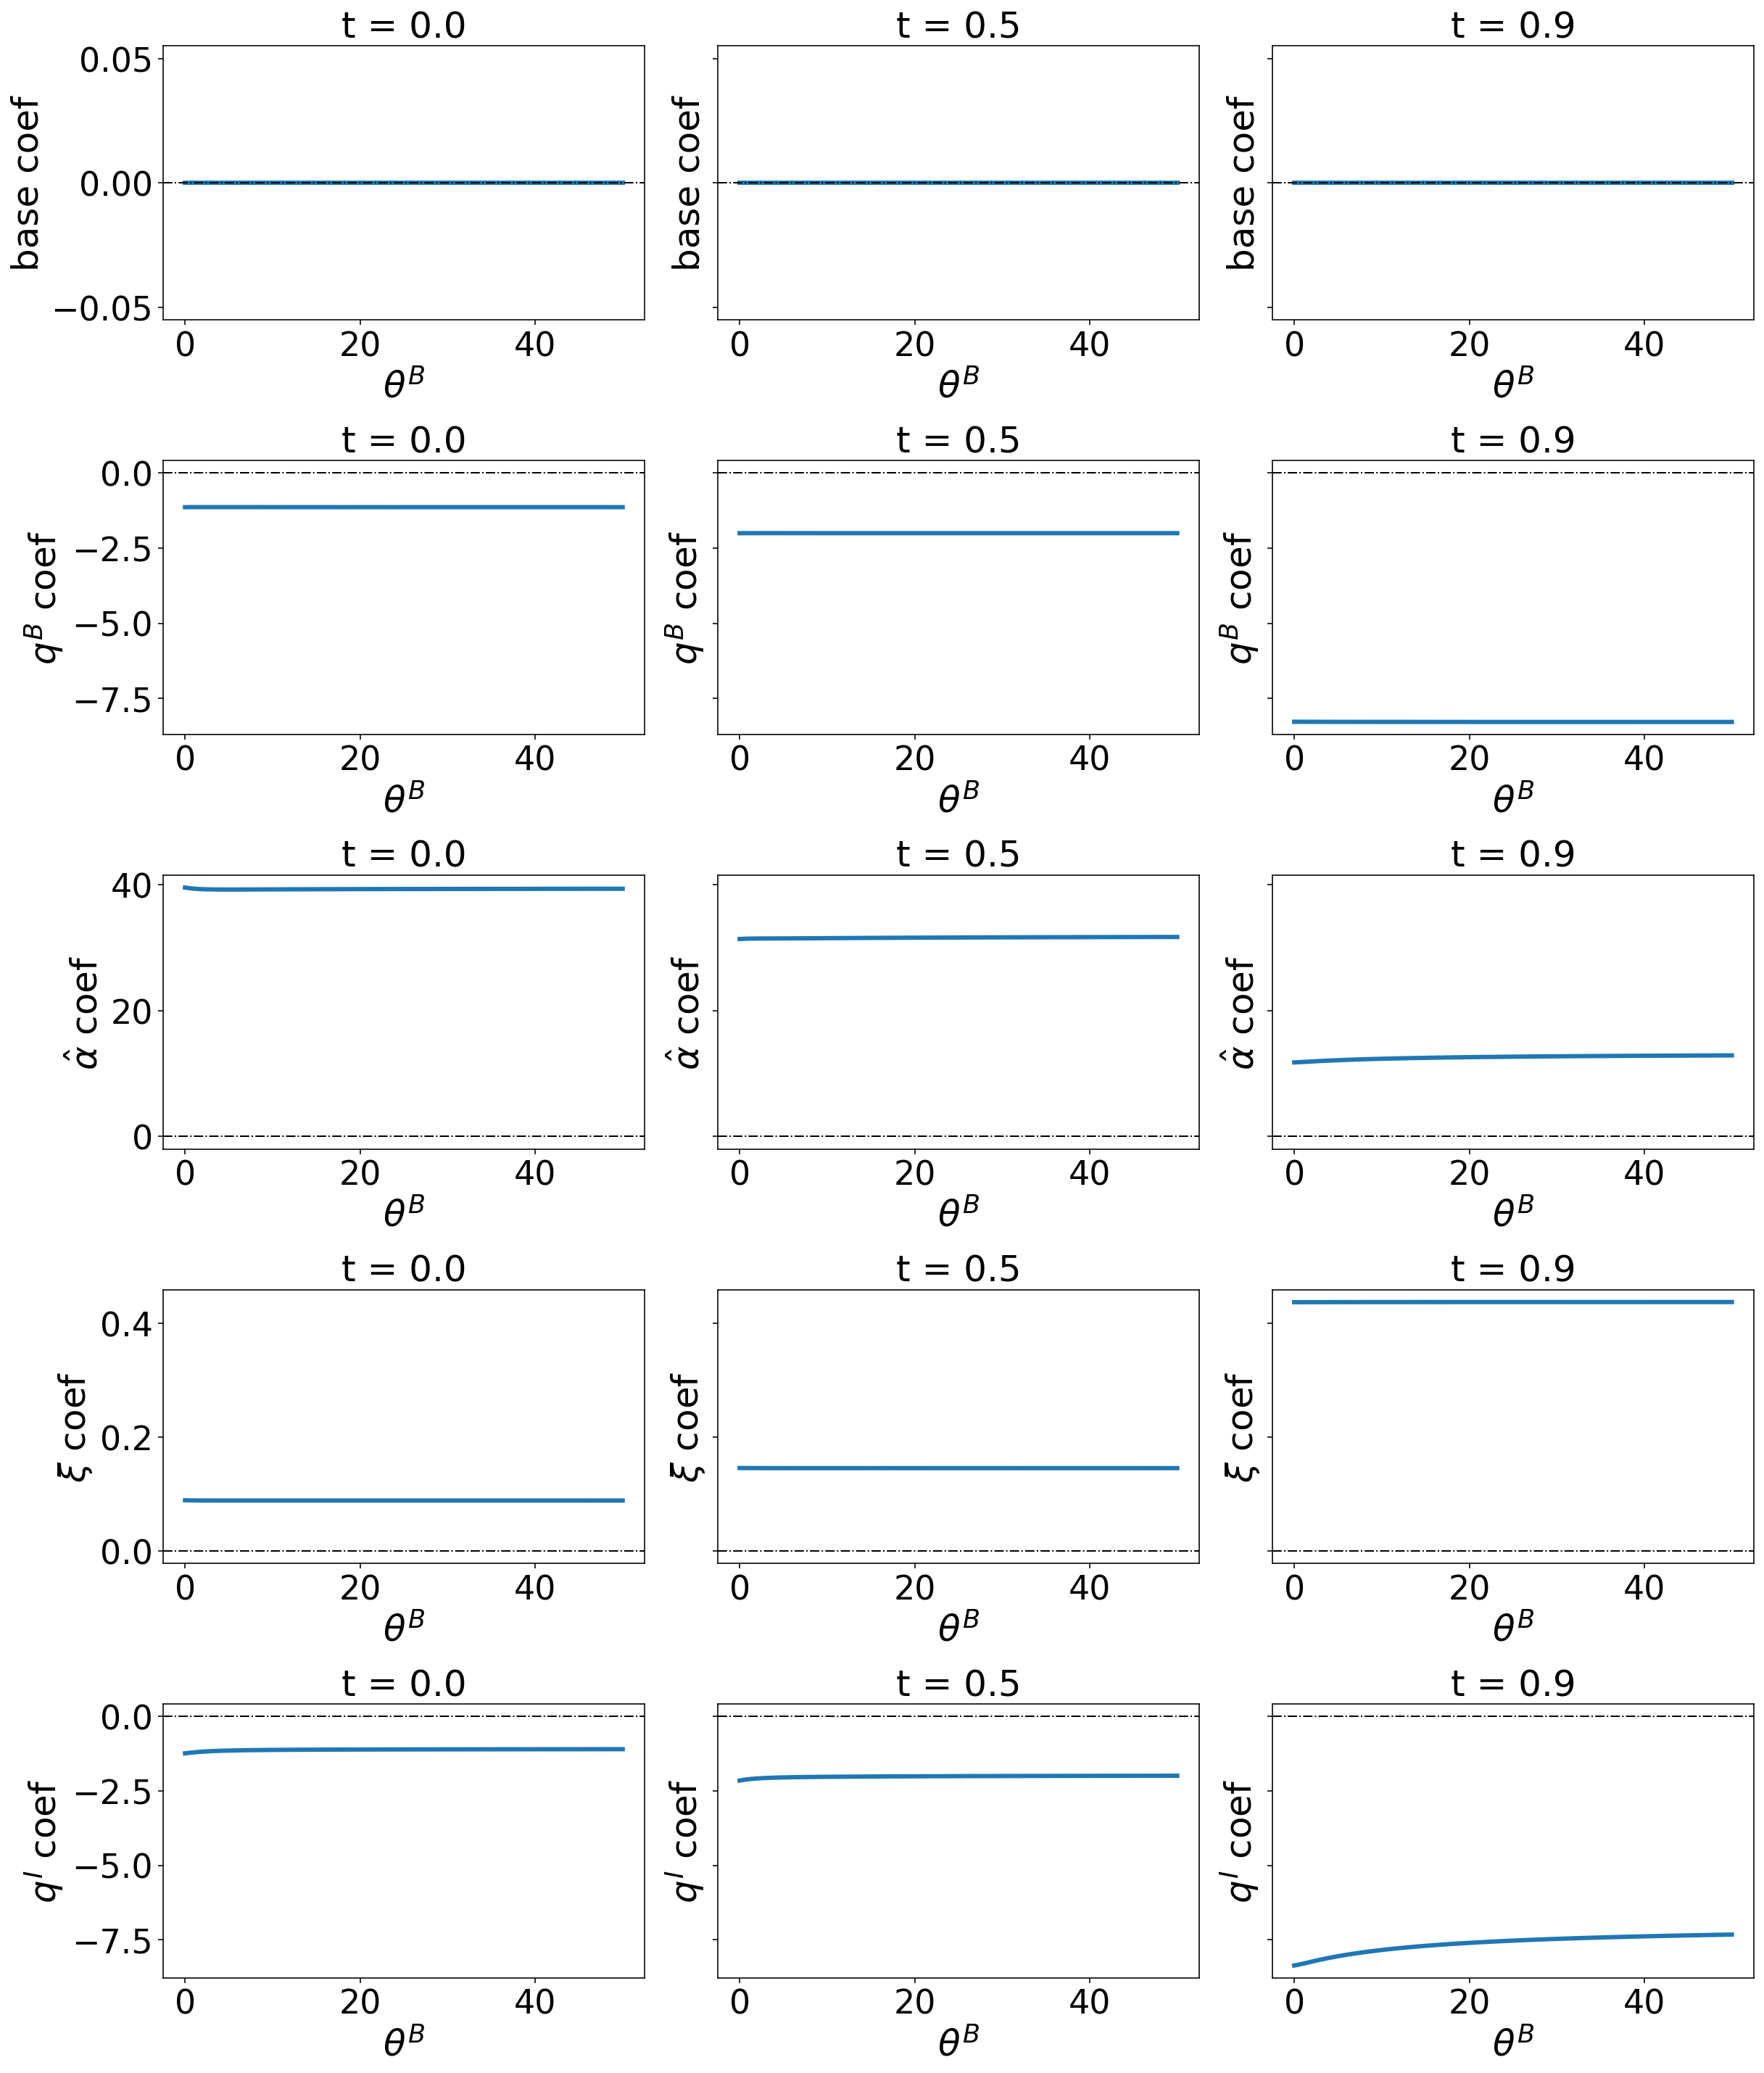

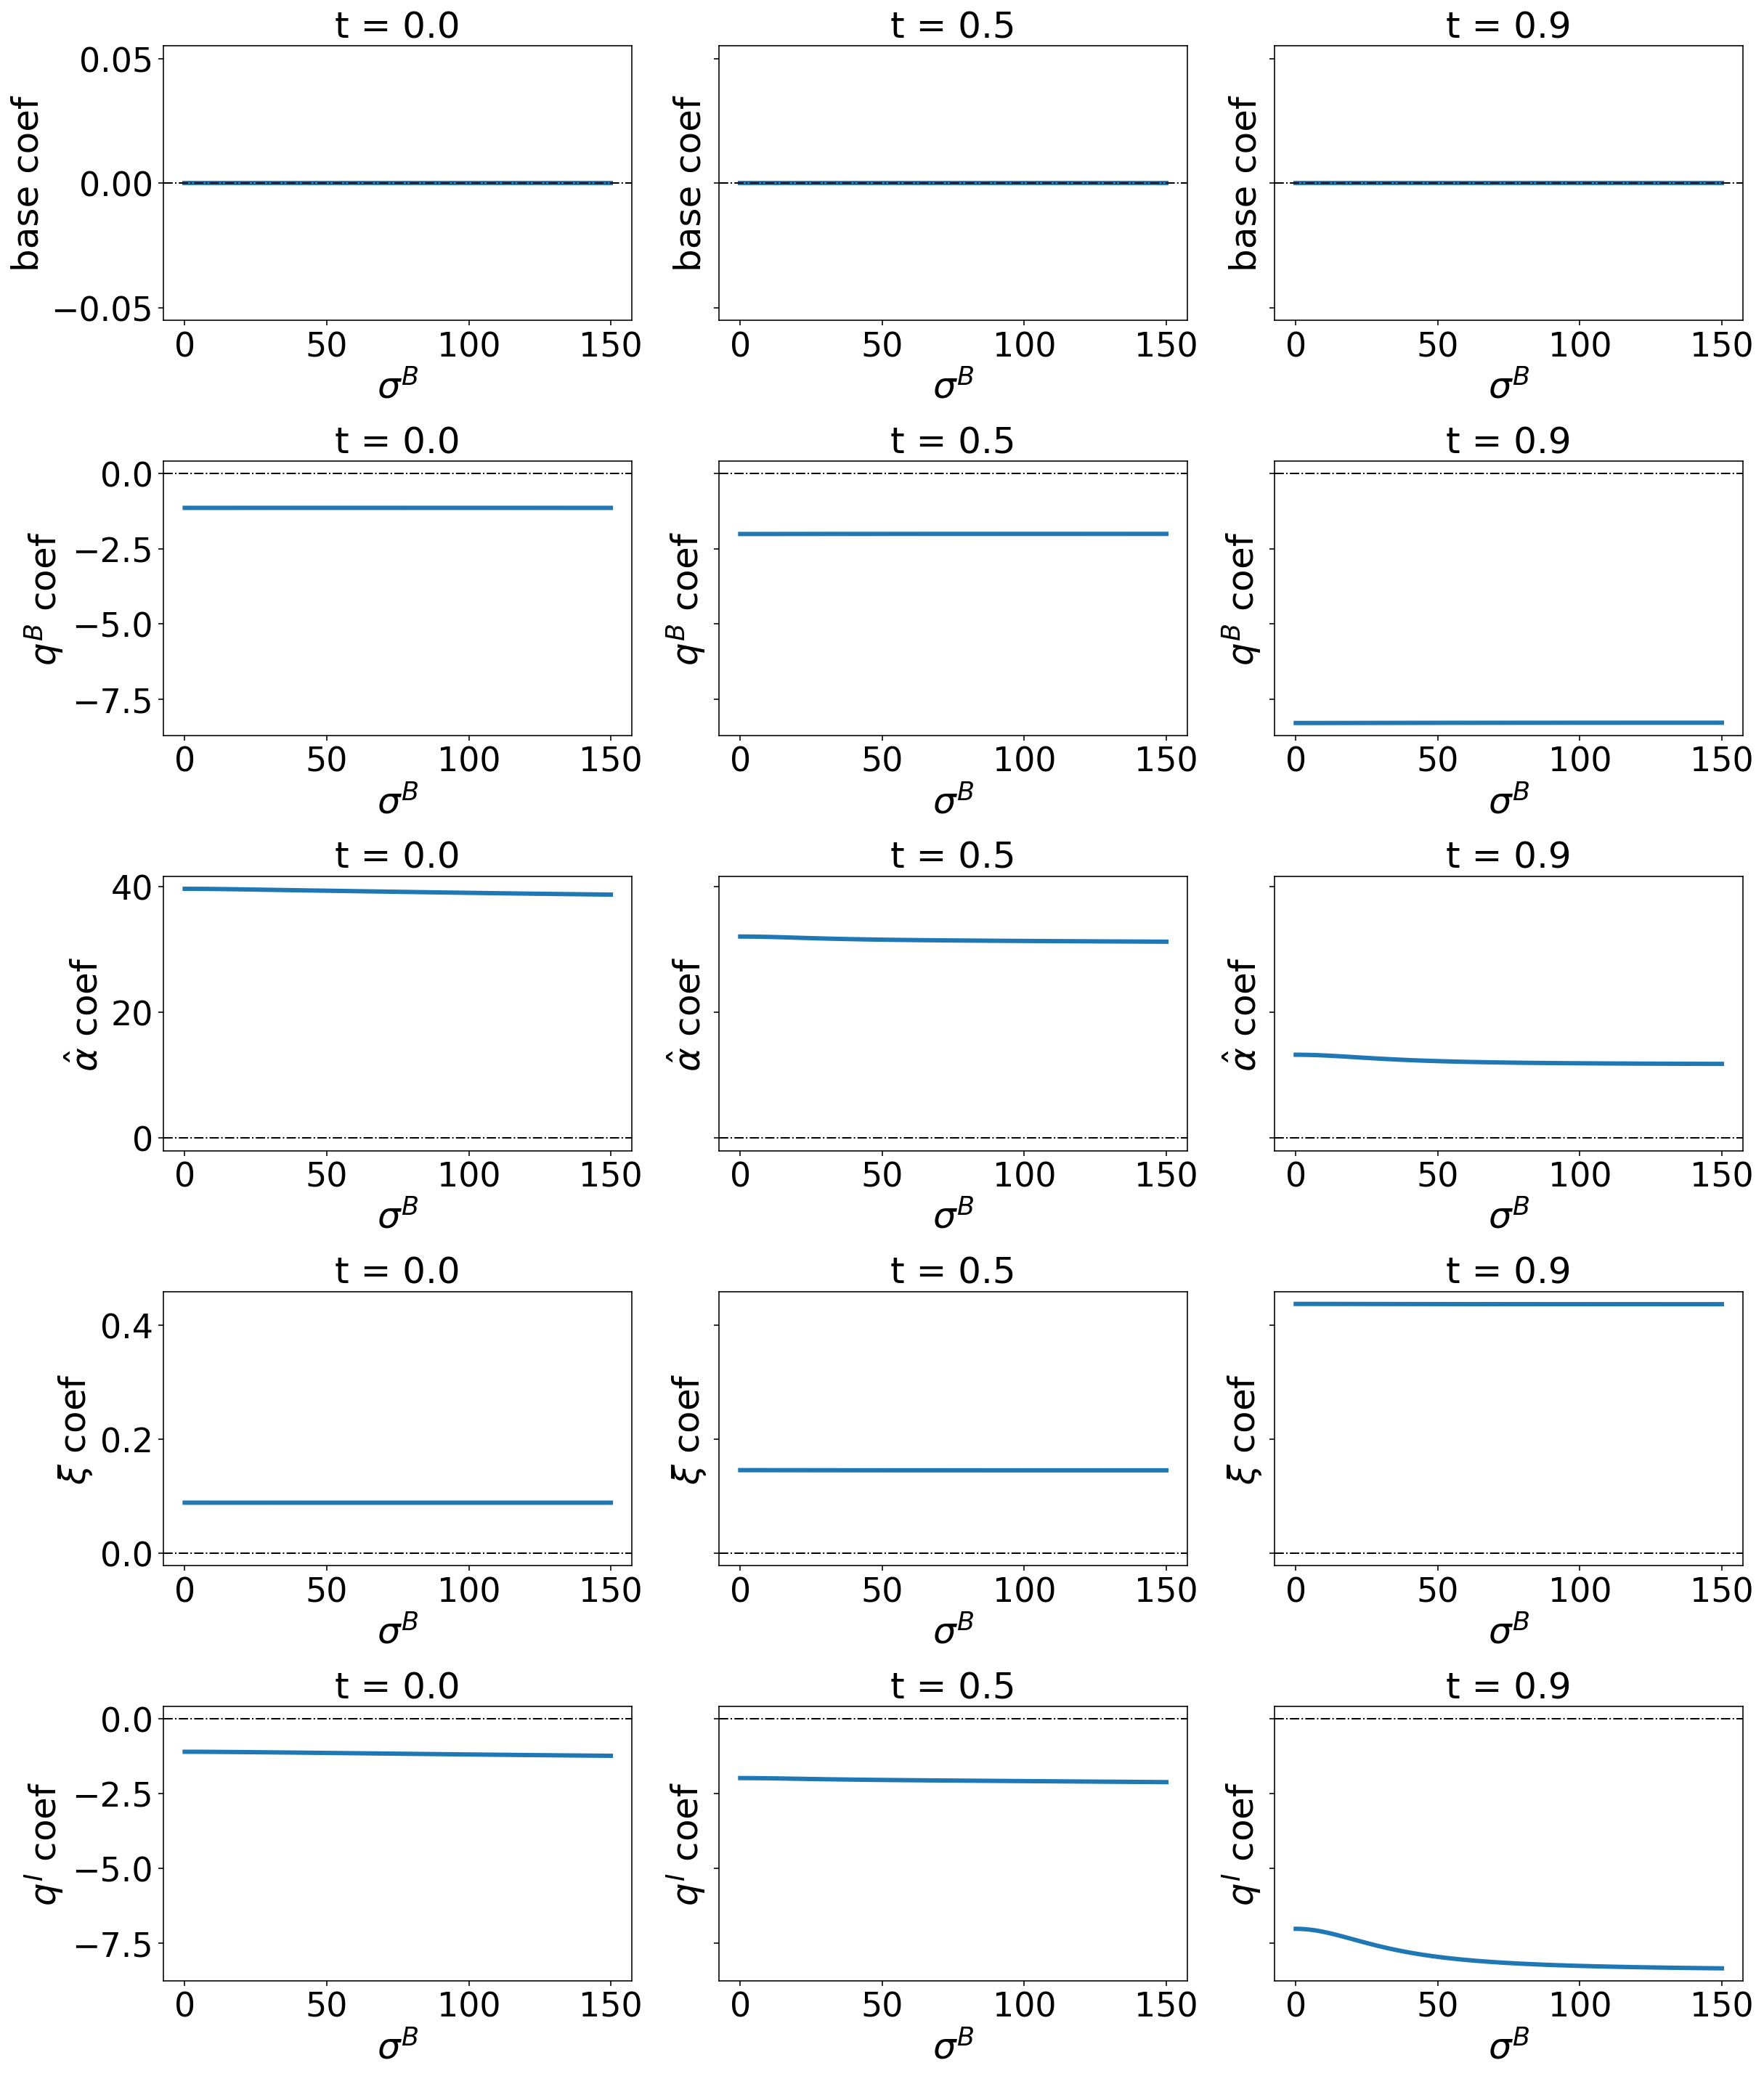

In [36]:
Nt = env.Nt

t_id = [0, Nt//2, 9*Nt//10]

for i, (param, (param_range, f_list)) in enumerate(param_dict.items()):
    fig, ax = plt.subplots(5, 3, figsize=(17,20), sharey = 'row')
    for k, (z_idx, coef) in enumerate(coef_symb.items()):
        for j, t in enumerate(t_id):
            f_param = np.array([f_list[j][t, 0, z_idx] for j in range((len(param_range)))])
            ax[k,j].plot(param_range, f_param, linewidth = 3)
            ax[k,j].set_xlabel(param_symb[param],fontsize=font1)
            ax[k,j].set_ylabel(coef,fontsize=font1)
            ax[k,j].set_title(f't = {env.timesteps[t]}',fontsize=font1)
            #ax[k,j].legend(fontsize=16,loc='upper left')
            ax[k,j].axhline(0, linestyle='-.', color = 'black', linewidth=1)
            ax[k,j].tick_params(axis='both', which='major', labelsize=font2)

    plt.tight_layout()
    plt.savefig(f'figures/nuB coef varying params uncertainty with {param}.png',format='png',bbox_inches='tight')
    plt.savefig(f'figures/nuB coef varying params uncertainty with {param}.pdf',format='pdf',bbox_inches='tight')
    plt.show()

In [38]:
baseline_broker = np.array([f_mu_B_list[j][:, 0, 0] for j in range((len(param_range)))])

In [42]:
for i in range(len(env.timesteps)):
    print(baseline_broker[:, i].max())

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.6645496038395557e-07
4.940609370160842e-07
8.209944011863884e-07
1.1472496769417024e-06
1.4728211591842188e-06
1.7977033128553414e-06
2.121890672123235e-06
2.4453778395869524e-06
2.768159485490326e-06
3.0902303469465155e-06
3.4115852271739488e-06
3.73221899474573e-06
4.052126582844968e-06
4.371302988537565e-06
4.6897432720497425e-06
5.007442556060216e-06
5.324396025001693e-06
5.640598924372288e-06
5.956046560058178e-06
6.270734297666925e-06
6.5846575618696635e-06
6.897811835754393e-06
7.210192660190523e-06
7.521795633199477e-06
7.832616409339652e-06
8.142650699099077e-06
8.451894268296807e-06
8.760342937495242e-06
9.067992581423154e-06
9.374839128403378e-06
9.680878559796855e-06
9.986106909448534e-06
1.0290520263148272e-05
1

In [ ]:
plt.plot(mu_B_range